<a href="https://colab.research.google.com/github/jongkwangyun/quant/blob/main/%EC%A0%81%EB%A6%BD%EC%8B%9D(%2B%EB%B0%B1%ED%85%8C%EC%8A%A4%ED%8A%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install pandas_market_calendars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 23.4 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import display, Markdown
import csv
import json

# 데이터 csv 내보내기 사용 여부
is_export_csv = False

# display에서 소수점 4자리까지 표현
pd.options.display.float_format = '{:.4f}'.format

# display시 DataFrame 모든 열 표시
pd.set_option('display.max_rows', 10)

# 데이터 가져올 기간을 지정합니다. (오늘로부터 12개월 전)
today = datetime.today().date()
# start_date = today - timedelta(days=375)

# 오늘 날짜 string에 저장
str_today = today.strftime('### %Y-%m-%d ')

# 전략명
str_strategy = '적립식 '

# 오늘 날짜를 가져와서 파일명에 추가
today_date = today.strftime('%y%m%d')
filename = f'{today_date} {str_strategy}.xlsx'

# csv 경로 설정
output_path =  '/content/drive/MyDrive/DynamicAssetAllocation/'

# 월평균영업일수. average Monthly Business Day
MBD = 21

# 전략에 사용할 ETF 명 리스트에 담기
etf_dividend_usa = ['SCHD', 'VYM', 'DGRO', 'JEPI']
etf_dividend_global = ['VIGI']
etf_carbon = ['KRBN']


# 자산군 리스트 더하기, 중복 제거
etf_order = list(set(etf_dividend_usa + etf_dividend_global + etf_carbon))

# ETF 가격 추출
df_etf = yf.download(etf_order, end=today)['Adj Close']\
.sort_index(ascending=False)[etf_order].rename_axis(None, axis=0).dropna()
display(df_etf)

# 1개월씩 자르기
df_etf_monthly = df_etf[::MBD]

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  6 of 6 completed


Ticker,VIGI,DGRO,SCHD,VYM,JEPI,KRBN
2024-02-16,79.9200,55.4600,76.9800,113.9300,56.2300,29.5500
2024-02-15,79.8500,55.5900,77.2400,114.2300,56.3500,29.9200
2024-02-14,79.2000,54.9700,76.3800,112.6600,56.1700,29.3700
2024-02-13,78.0900,54.6800,76.0800,112.1100,55.8600,29.4000
2024-02-12,79.4300,55.4300,77.2600,113.6600,56.1500,29.6600
...,...,...,...,...,...,...
2020-08-06,63.0427,36.6508,49.1435,73.5123,39.7605,15.5614
2020-08-05,62.8829,36.5772,49.2145,73.5481,39.6933,15.7680
2020-08-04,62.6963,36.3931,48.6826,73.3333,39.6858,15.6651
2020-08-03,62.3944,36.2919,48.5053,72.8678,39.6634,15.4841


In [3]:
# 인덱스 만들기
df_momentum_index = ['today/' + str(df_etf.index[0].date()), '1mo_ago/' + str(df_etf.index[MBD].date()), \
                     '3mo_ago/' + str(df_etf.index[MBD*3].date()), '6mo_ago/' + str(df_etf.index[MBD*6].date()), \
                     '12mo_ago/' + str(df_etf.index[MBD*12].date())]


## DataFrame 만들기: 1-3-6-12 개월 etf 가격
price_today = df_etf.iloc[0:1]
price_1mo = df_etf.shift(-MBD).iloc[0:1]
price_3mo = df_etf.shift(-MBD*3).iloc[0:1]
price_6mo = df_etf.shift(-MBD*6).iloc[0:1]
price_12mo = df_etf.shift(-MBD*12).iloc[0:1]

df_price = pd.concat([price_today, price_1mo, price_3mo, price_6mo, price_12mo])
df_price.index = df_momentum_index

str_etf_price = str_today + str_strategy + "### ETF 현재-1-3-6-12 개월 가격"
display(Markdown(str_etf_price))
display(df_price)

# csv에 제목 및 DataFrame 추가. 드라이브 마운트 후 해야함
if is_export_csv:
  with open(output_path + filename, 'a') as f:
    f.write('\n')
    f.write(f'{str_etf_price}\n')
    df_price.to_csv(f, index=True)

### 2024-02-18 적립식 ### ETF 현재-1-3-6-12 개월 가격

Ticker,VIGI,DGRO,SCHD,VYM,JEPI,KRBN
today/2024-02-16,79.9200,55.4600,76.9800,113.9300,56.2300,29.5500
1mo_ago/2024-01-18,78.2600,53.6100,75.7000,110.3800,54.9130,31.5200
3mo_ago/2023-11-15,73.3626,50.4426,70.6150,104.0910,53.1003,36.0444
6mo_ago/2023-08-17,72.6371,50.6675,71.9863,104.7678,52.7269,37.1753
12mo_ago/2023-02-15,72.0329,50.3474,74.5079,106.9705,52.0954,36.4807


In [4]:
## DataFrame 만들기: 모멘텀 스코어 (안써도 되나 뒤 코드 처리할때 사용)
df_etf_monthly_copy = df_etf_monthly.copy(deep=True)
df_etf_momentum_score = pd.DataFrame(index=df_etf_monthly.index, columns=df_etf_monthly.columns)

for i in range(0, len(df_etf_monthly) - 12):
  ror_1mo = df_etf_monthly_copy.pct_change(-1).iloc[0]  # 1개월 수익률
  ror_3mo = df_etf_monthly_copy.pct_change(-3).iloc[0]  # 3개월 수익률
  ror_6mo = df_etf_monthly_copy.pct_change(-6).iloc[0]  # 6개월 수익률
  ror_12mo = df_etf_monthly_copy.pct_change(-12).iloc[0]  # 12개월 수익률
  df_etf_monthly_copy.drop(df_etf_monthly_copy.index[0], inplace=True)

  # 가중치 더하기
  df_etf_momentum_score.iloc[i] = ((12 * ror_1mo) + (4 * ror_3mo) + (2 * ror_6mo) + (ror_12mo)) * 100

df_etf_momentum_score.dropna(inplace=True)

str_etf_momentum_score = str_today + str_strategy + "### ETF 별 1-3-6-12 개월 Momentum Score"

In [5]:
## DataFrame 만들기: ETF 종목, 종목별 투자 비율
row_count = len(df_etf_momentum_score)
etf_count = len(etf_order)

columns_num = [i for i in range(etf_count)]
df_high_etf = pd.DataFrame(columns=columns_num, index=df_etf_momentum_score.index)
df_buy_ratio_etf = pd.DataFrame(columns=columns_num, index=df_etf_momentum_score.index)

portfolio_ratio = [1/etf_count] * etf_count

# 마지막에 출력할 str 정의
str_buy_etf = ''
str_etf_ratio = ''

df_high_etf = df_buy_ratio_etf.where(df_buy_ratio_etf.notna(), etf_order, axis='columns')

str_high_etf = str_today + str_strategy + "### ETF 투자 종목 선정"
display(Markdown(str_high_etf))
display(df_high_etf.head(5))

# csv에 제목 및 DataFrame 추가
if is_export_csv:
  with open(output_path + filename, 'a') as f:
    f.write('\n')
    f.write(f'{str_high_etf}\n')
    df_high_etf.head(5).to_csv(f, index=True)

### 2024-02-18 적립식 ### ETF 투자 종목 선정

,0,1,2,3,4,5
2024-02-16,VIGI,DGRO,SCHD,VYM,JEPI,KRBN
2024-01-18,VIGI,DGRO,SCHD,VYM,JEPI,KRBN
2023-12-15,VIGI,DGRO,SCHD,VYM,JEPI,KRBN
2023-11-15,VIGI,DGRO,SCHD,VYM,JEPI,KRBN
2023-10-17,VIGI,DGRO,SCHD,VYM,JEPI,KRBN


In [6]:
# 종목별 투자 비율
df_buy_ratio = df_buy_ratio_etf.where(df_buy_ratio_etf.notna(), portfolio_ratio, axis='columns')

str_buy_ratio = str_today + str_strategy + "### ETF 투자 비율"
display(Markdown(str_buy_ratio))
display(df_buy_ratio)

# csv에 제목 및 DataFrame 추가
if is_export_csv:
  with open(output_path + filename, 'a') as f:
    f.write('\n')
    f.write(f'{str_buy_ratio}\n')
    df_buy_ratio.head(5).to_csv(f, index=True)

### 2024-02-18 적립식 ### ETF 투자 비율

,0,1,2,3,4,5
2024-02-16,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667
2024-01-18,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667
2023-12-15,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667
2023-11-15,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667
2023-10-17,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667
...,...,...,...,...,...,...
2021-12-14,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667
2021-11-12,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667
2021-10-14,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667
2021-09-15,0.1667,0.1667,0.1667,0.1667,0.1667,0.1667


In [7]:
## 백테스트
monthly_column_count = df_high_etf.shape[1]
monthly_index = df_high_etf.index

# 비율대로 돈 투자
df_invest_money = pd.DataFrame(columns=[i for i in range(monthly_column_count)], index=monthly_index)
df_invest_count = pd.DataFrame(columns=[i for i in range(monthly_column_count)], index=monthly_index)
df_cash = pd.DataFrame(columns=['cash'], index=monthly_index)

# 초기자본
invest_cash = 10_000

for i in reversed(range(row_count)):
  row_sum = 0

  for j in range(monthly_column_count):
    if i == row_count - 1:
      row_sum = invest_cash
      break
    else:
      sel_etf = df_high_etf.iloc[i+1][j]
      row_sum += df_invest_count.iloc[i+1][j] * df_etf_monthly.iloc[i][sel_etf]

  for j in range(monthly_column_count):
    df_cash.iloc[i][0] = row_sum
    sel_etf = df_high_etf.iloc[i][j]
    sel_etf_price = df_etf_monthly.iloc[i][sel_etf]
    sel_etf_buy_count = df_cash.iloc[i][0] * df_buy_ratio.iloc[i][j] / sel_etf_price
    df_invest_count.iloc[i][j] = sel_etf_buy_count

# 종목 대체 테스트용 코드
# df_cash = df_cash[:133].dropna()
# row_count = len(df_cash)
display(Markdown(str_today + str_strategy + '### ETF 구매 개수'))
display(df_invest_count)
display(Markdown(str_today + str_strategy + '### 평가 금액'))
display(df_cash)

CAGR = str(round(((df_cash.iloc[0][0] / df_cash.iloc[-1][0]) ** (12/(row_count-1)) - 1)*100, 2))
display(Markdown(f'{str_today[1:]} {str_strategy} ## CAGR: {CAGR} %'))

### 2024-02-18 적립식 ### ETF 구매 개수

,0,1,2,3,4,5
2024-02-16,22.5910,32.5545,23.4538,15.8472,32.1087,61.0988
2024-01-18,22.8181,33.3099,23.5898,16.1782,32.5195,56.6544
2023-12-15,23.2421,33.4854,23.6475,16.1906,32.8399,54.5628
2023-11-15,23.6877,34.4509,24.6094,16.6950,32.7266,48.2126
2023-10-17,23.9290,34.5732,24.2966,16.6877,32.6519,48.2943
...,...,...,...,...,...,...
2021-12-14,22.0550,34.2243,24.2232,17.2219,34.0909,47.1378
2021-11-12,21.0633,33.8998,23.7448,16.8843,33.8870,51.8409
2021-10-14,20.8214,34.1346,23.6061,16.8639,33.3711,53.2319
2021-09-15,20.1243,33.9056,23.6950,16.9713,33.0295,55.3764


### 2024-02-18 적립식 ### 평가 금액

,cash
2024-02-16,10832.8224
2024-01-18,10714.4755
2023-12-15,10705.2272
2023-11-15,10426.7650
2023-10-17,10307.2088
...,...
2021-12-14,10552.7795
2021-11-12,10416.6183
2021-10-14,10031.2367
2021-09-15,9975.0802


## 2024-02-18  적립식  ## CAGR: 3.25 %

In [10]:
## 결과 출력
display(Markdown(str_today[1:] + str_strategy))

display(df_price.iloc[0:1].T)

# csv에 제목 및 DataFrame 추가
if is_export_csv:
  with open(output_path + filename, 'a') as f:
    f.write('\n')
    f.write(f'{str_today[1:] + str_strategy}\n')

## 2024-02-18 적립식 

,today/2024-02-16
Ticker,
VIGI,79.9200
DGRO,55.4600
SCHD,76.9800
VYM,113.9300
JEPI,56.2300
KRBN,29.5500


<Axes: >

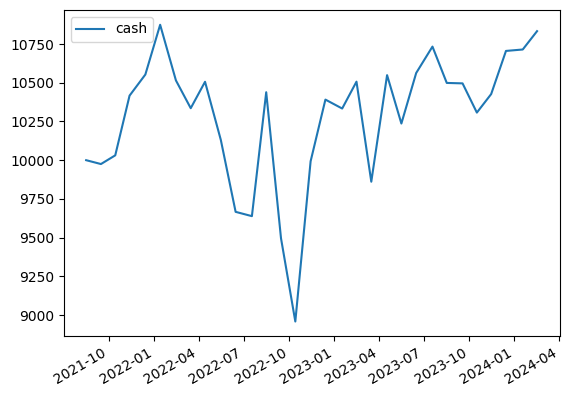

In [9]:
df_cash.plot()